Esse é o relatório sobre o EP3 do Igor Fratel Santana.

O primeiro programa gera os histogramas das tranformações sobre listas uniformes. Nele podemos notar que, após serem modificadas pelas funções, as listas contendo valores aleatórios passam a apresentar determinados padrões de valores.
Variáveis:
    n: tamanho das listas usadas
    m: número de intervalos nos histogramas
    a,b: números utilizados na transformacaoEscala
    

n: 10000
m: 20
a: 5
b: 6


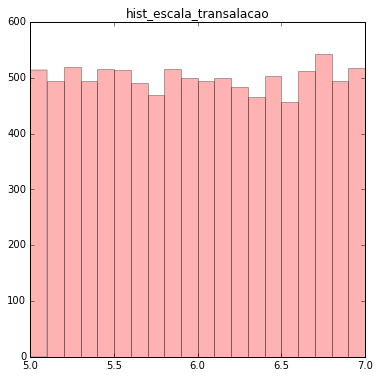

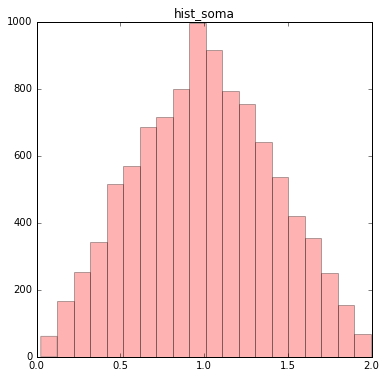

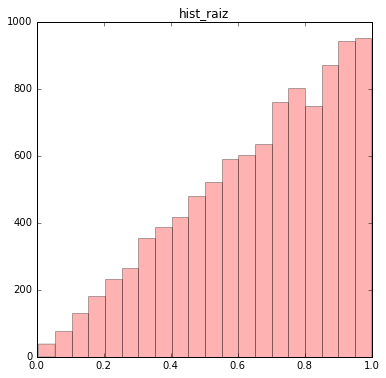

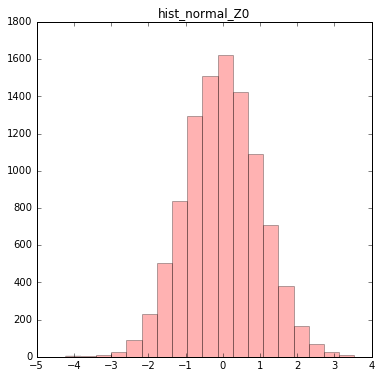

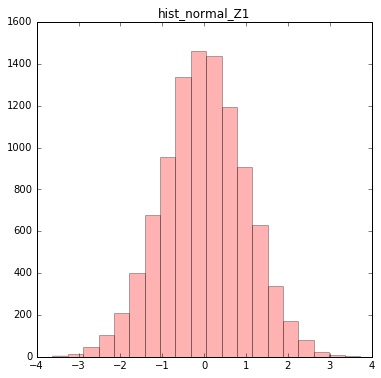

In [1]:
#.n Igor Fratel Santana
#.u 9793565
%matplotlib inline

from random import random
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos,log

def  transformacaoEscala(U, V, n, a, b):
	i=0
	while i<n:
		V[i] = a+U[i]*(b-a+1)
		i+=1
	return V

def somaVetores(U1,U2,U,n):
    i=0
    while i<n:
        U[i] = U1[i]+U2[i]
        i+=1
    return U
	
def raizVetor(U,n):
	i=0
	while i<n:
		U[i] = U[i]**(1/2)
		i+=1
	return U

def normalTransform(U1,U2,Z1,Z2,n):
	i=0
	while i<n:
	    Z1[i] = cos(2*pi*U2[i])*((-2*log(U1[i]))**(1/2))
	    Z2[i] = sin(2*pi*U2[i])*((-2*log(U1[i]))**(1/2))
	    i+=1
	return Z1,Z2

def histogram(U,m):

    return plt.hist(U,m,facecolor='r',alpha=0.3)

#pedir os valores e criar as listas necessarias
n=int(input('n: '))
m=int(input('m: '))
a=float(input('a: '))
b=float(input('b: '))
i=0
list_unif=[]
list_unif2=[]
list_zerada=[]
list_zerada2=[]
while i<n:
    list_unif.append(random())
    list_unif2.append(random())
    list_zerada.append(0)
    i+=1
#plotando o primeiro histograma
plt.figure(figsize=(6, 6), dpi=80)
resultante = transformacaoEscala(list_unif,list_zerada, n, a, b)
histogram(resultante,m)
plt.title('hist_escala_transalacao')
plt.show('hist_escala_transalacao.png')

#plotando o segundo histograma
plt.figure(figsize=(6,6), dpi=80)
resultante = somaVetores(list_unif,list_unif2,list_zerada,n)
histogram(resultante,m)
plt.title('hist_soma')
plt.show('hist_soma.png')

#'resetando' uma lista que foi modificada nas operações anteriores
i=0
while i<n:
    list_unif[i]=random()
    i+=1

#plotando o terceiro histograma
plt.figure(figsize=(6, 6), dpi=80)
resultante = raizVetor(list_unif,n)
histogram(resultante,m)
plt.title('hist_raiz')
plt.show('hist_raiz.png')

#'resetando' listas modificadas pelas operações anteriores 
i=0
while i<n:
	list_unif[i]=random()
	list_unif2[i]=random()
	list_zerada[i]=0
	list_zerada2.append(0)
	i+=1

#plotando o quarto histograma(partes 1 e 2)
plt.figure(figsize=(6,6), dpi=80)
normalTransform(list_unif,list_unif2,list_zerada,list_zerada2,n)
histogram(list_zerada,m)
plt.title('hist_normal_Z0')
plt.show('hist_normal_Z0')

plt.figure(figsize=(6, 6), dpi=80)
histogram(list_zerada2,m)
plt.title('hist_normal_Z1')
plt.show('hist_normal_Z1')

Agora serão gerados os gráficos das funções principais
A ordem dos gráficos é: listaCordasM1,listaCordasM2,listaCordasM3; sendo que com cada uma dessas funções serão
geradas 4 distribuições na ordem: distribuicaoBorda, distribuicaoRadial, distribuicaoArea, distribuicaoCordas

Variáveis:
    r: raio do círculo gerado
    n: tamanho das listas usadas
    
Recomendo usar o n com o valor de 10000


r: 45.5
n: 10000


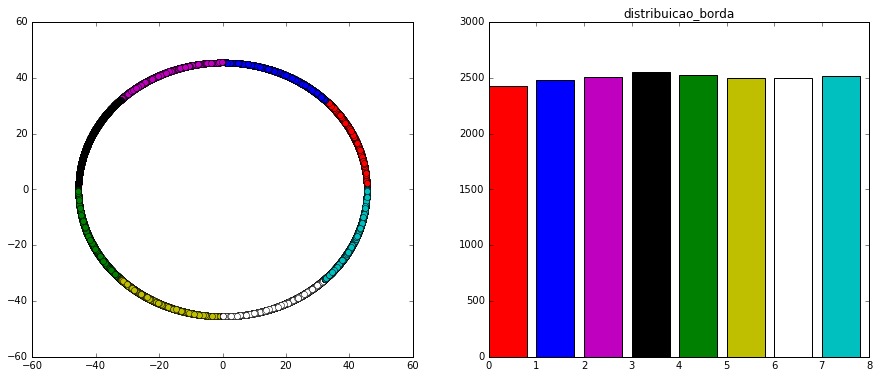

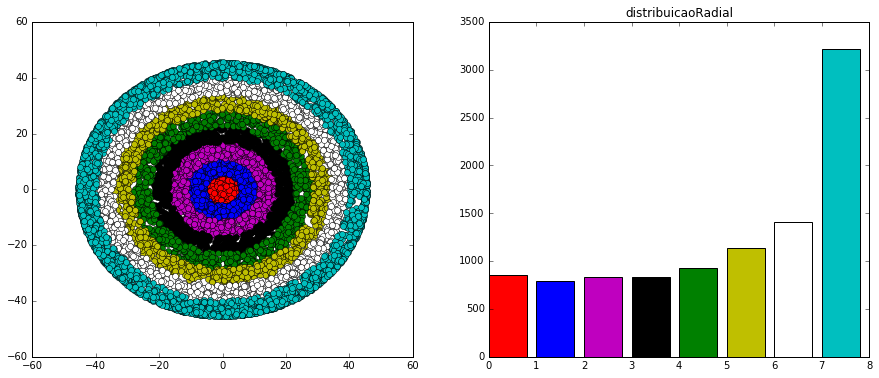

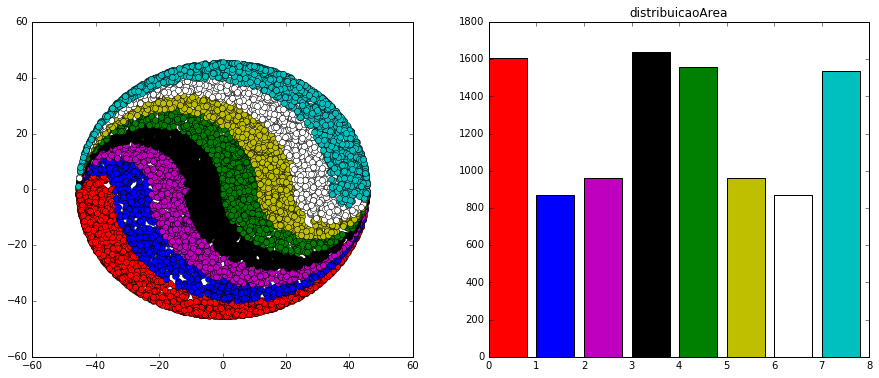

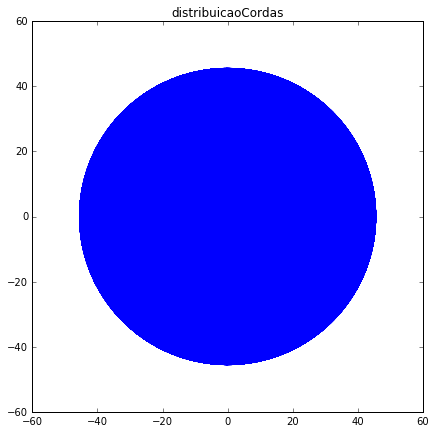

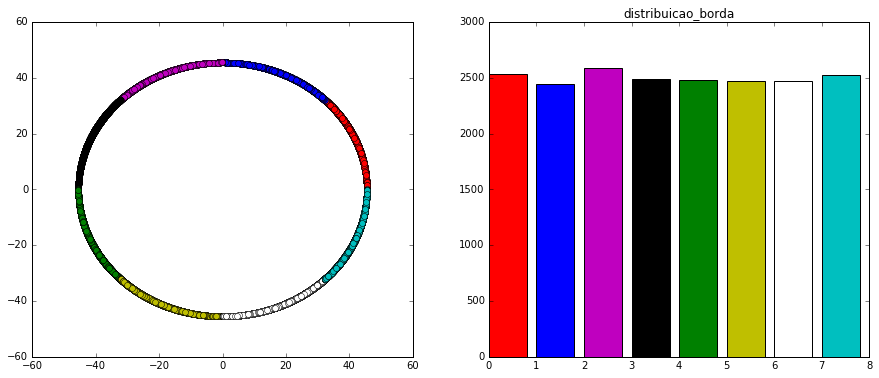

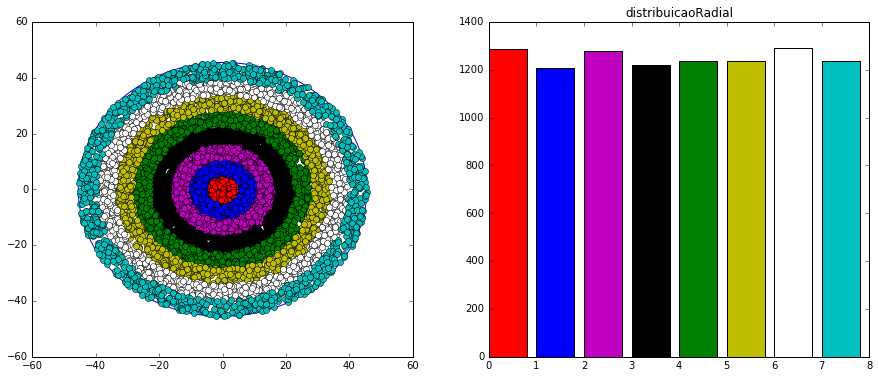

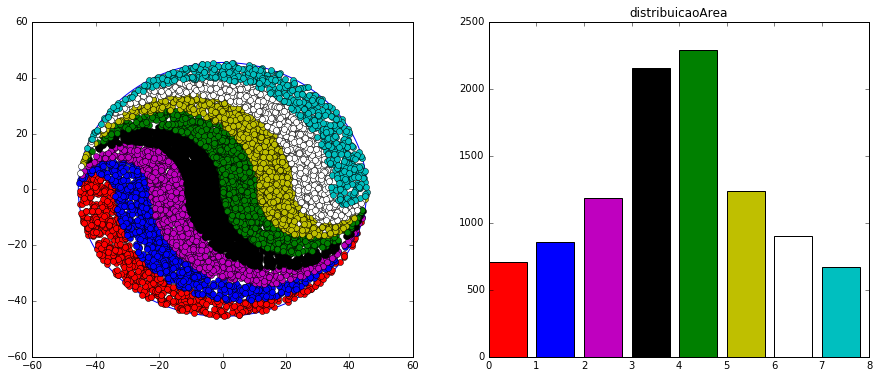

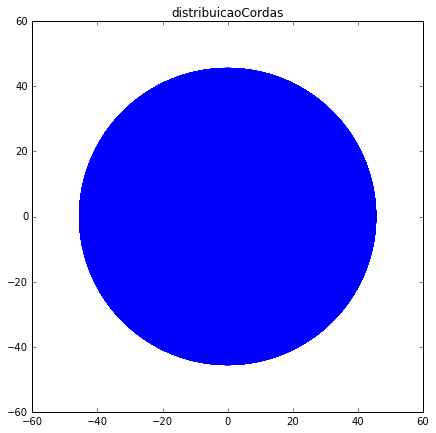

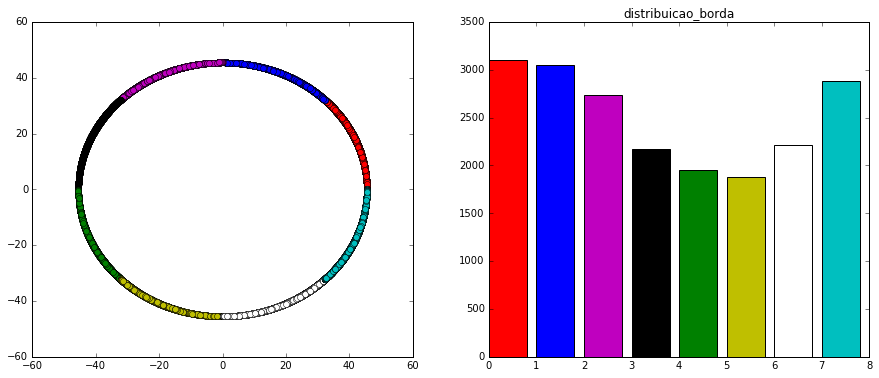

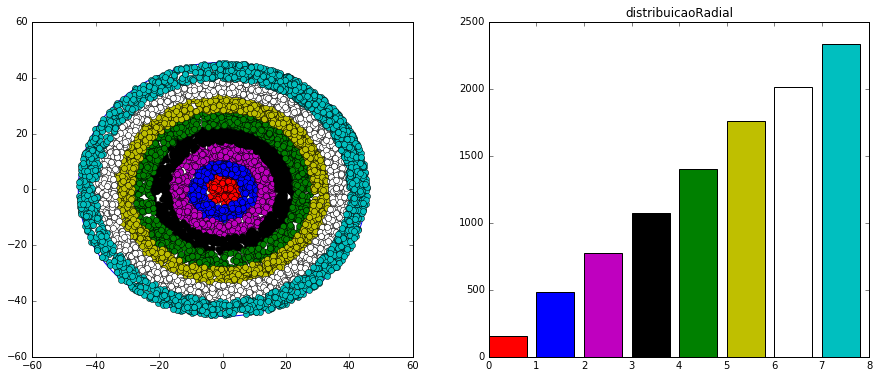

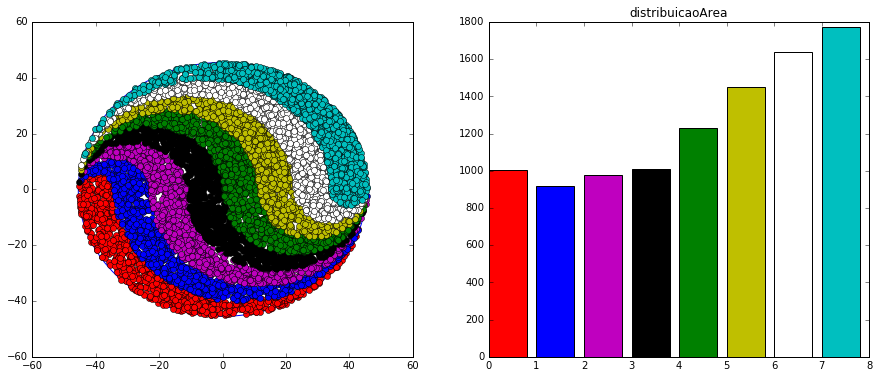

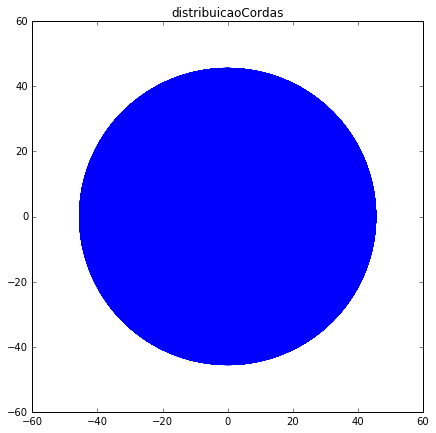

In [1]:
#.n Igor Fratel Santana
#.u 9793565
%matplotlib inline
from random import random,uniform
from math import pi,sin,sqrt,cos,log
import matplotlib.pyplot as plt
import numpy as np

#funções para auxiliar as modificações no ep2:
def determinaPontosMedios(listaExtremos):
    i=0
    lista=[]
    tupla=()
    xM,yM=0,0
    while i<len(listaExtremos):
        xM=(listaExtremos[i][0][0]+listaExtremos[i][1][0])/2
        yM=(listaExtremos[i][0][1]+listaExtremos[i][1][1])/2
        tupla=(xM,yM)
        lista.append(tupla)
        i+=1
    return lista
    
def determinaPontosExtremos(r,listaPontosMedios):
    d=0
    i=0
    seno=0
    coseno=0
    xA,xB,yA,yB=0,0,0,0
    xC,yC=0,0
    lista=[]
    tupla=()
    while i<len(listaPontosMedios):
        d=(listaPontosMedios[i][0]**2 + listaPontosMedios[i][1]**2)**(1/2) 
        coseno=d/r
        seno=(1-coseno**2)**(1/2)
        xC=listaPontosMedios[i][0]*r/d
        yC=listaPontosMedios[i][1]*r/d
        xA = coseno*xC + (-seno*yC)
        yA = seno*xC + coseno*yC
        xB = coseno*xC + seno*yC
        yB = -seno*xC + coseno*yC
        tupla = ((xA,yA),(xB,yB))
        lista.append(tupla)
        i+=1
    return lista
 
#Funções modificadas do EP2:
 
def listaCordasM1(r,n):
    xA,xB,yA,yB = 0,0,0,0
    i=0
    lista=[]
    tupla=()
    while i<n:
        #Escolher dois pontos entre 0 e ~(2*pi*r) 
        #Imaginar a circunferencia como uma reta esticada
        A=uniform(0,(2*pi*r))
        B=uniform(0,(2*pi*r))
        #calcular as coordenadas de A e B:
        #calcular os angulos centrais de A e B, sabendo o comprimento dos arcos:
        ang_A = A/r
        ang_B = B/r
        #calcular os X's:
        xA = cos(ang_A)*r
        xB = cos(ang_B)*r
        #calcular os Y's:
        yA = sin(ang_A)*r
        yB = sin(ang_B)*r
        tupla=((xA,yA),(xB,yB))
        lista.append(tupla)
        i+=1
    return lista
 
def listaCordasM2(r,n):
        i=0
        C,xC,yC,ang_C=0,0,0,0
        xP,yP=0,0
        lista=[]
        tupla=()
        while i<n:
            #Escolher um ponto C na circunferencia que será o ponto médio da corda
            C=uniform(0,2*pi*r)
            ang_C= C/r
            xC=cos(ang_C)*r
            yC=sin(ang_C)*r
            #escolher um ponto P na reta OC
            xP=uniform(0,xC)
            yP=(yC/xC)*(xP-xC)+yC
            tupla=(xP,yP)
            lista.append(tupla)
            i+=1
        return determinaPontosExtremos(r,lista)
        
def listaCordasM3(r,n):
        i=0
        lista=[]
        tupla=()
        while i<n:
            #Escolher um ponto P no círculo que será o ponto médio da corda
            xP=uniform(-r,r)
            yP=uniform(-r,r)
            #ver se o ponto está mesmo no círculo
            while xP**2+yP**2>r**2:
                xP=uniform(0,r)
                yP=uniform(0,r)
            tupla=(xP,yP)
            lista.append(tupla)
            i+=1
        #retorna os pontos extremos da corda com P sendo o ponto médio
        return determinaPontosExtremos(r,lista)

        
def distribuicaoBorda(r,listaCordas):
    tupla=()
    lista=[[],[],[],[],[],[],[],[]]
    lista_hist=[None]*8
    i=0
    #verificar em qual pedaço do circulo está o ponto:
    while i<len(listaCordas):
        if cos(2*pi)*r>listaCordas[i][0][0]>=cos(pi/4)*r and sin(2*pi)*r<listaCordas[i][0][1]<=sin(pi/4)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[0].append(tupla)
        elif cos(pi/4)*r>listaCordas[i][0][0]>=cos(pi/2)*r and sin(pi/4)*r<listaCordas[i][0][1]<=sin(pi/2)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[1].append(tupla)
        elif cos(pi/2)*r>listaCordas[i][0][0]>=cos(3*pi/4)*r and sin(pi/2)*r>listaCordas[i][0][1]>=sin(3*pi/4)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[2].append(tupla)
        elif cos(3*pi/4)*r>listaCordas[i][0][0]>=cos(pi)*r and sin(3*pi/4)*r>listaCordas[i][0][1]>=sin(pi)*r :
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[3].append(tupla)
        elif cos(pi)*r<listaCordas[i][0][0]<=cos(5*pi/4)*r and sin(pi)*r>listaCordas[i][0][1]>=sin(5*pi/4)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[4].append(tupla)
        elif cos(5*pi/4)*r<listaCordas[i][0][0]<=cos(3*pi/2)*r and sin(5*pi/4)*r>listaCordas[i][0][1]>=sin(3*pi/2)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[5].append(tupla)
        elif cos(3*pi/2)*r<listaCordas[i][0][0]<=cos(7*pi/4)*r and sin(3*pi/2)*r<listaCordas[i][0][1]<=sin(7*pi/4)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[6].append(tupla)
        elif cos(7*pi/4)*r<listaCordas[i][0][0]<=cos(2*pi)*r and sin(7*pi/4)*r<listaCordas[i][0][1]<=sin(2*pi)*r:
            tupla=(listaCordas[i][0][0],listaCordas[i][0][1])
            lista[7].append(tupla)

        if cos(2*pi)*r>listaCordas[i][1][0]>=cos(pi/4)*r and sin(2*pi)*r<listaCordas[i][1][1]<=sin(pi/4)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[0].append(tupla)
        elif cos(pi/4)*r>listaCordas[i][1][0]>=cos(pi/2)*r and sin(pi/4)*r<listaCordas[i][1][1]<=sin(pi/2)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[1].append(tupla)
        elif cos(pi/2)*r>listaCordas[i][1][0]>=cos(3*pi/4)*r and sin(pi/2)*r>listaCordas[i][1][1]>=sin(3*pi/4)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[2].append(tupla)
        elif cos(3*pi/4)*r>listaCordas[i][1][0]>=cos(pi)*r and sin(3*pi/4)*r>listaCordas[i][1][1]>=sin(pi)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[3].append(tupla)
        elif cos(pi)*r<listaCordas[i][1][0]<=cos(5*pi/4)*r and sin(pi)*r>listaCordas[i][1][1]>=sin(5*pi/4)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[4].append(tupla)
        elif cos(5*pi/4)*r<listaCordas[i][1][0]<=cos(3*pi/2)*r and sin(5*pi/4)*r>listaCordas[i][1][1]>=sin(3*pi/2)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[5].append(tupla)
        elif cos(3*pi/2)*r<listaCordas[i][1][0]<=cos(7*pi/4)*r and sin(3*pi/2)*r<listaCordas[i][1][1]<=sin(7*pi/4)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[6].append(tupla)
        elif cos(7*pi/4)*r<listaCordas[i][1][0]<=cos(2*pi)*r and sin(7*pi/4)*r<listaCordas[i][1][1]<=sin(2*pi)*r:
            tupla=(listaCordas[i][1][0],listaCordas[i][1][1])
            lista[7].append(tupla)
        i+=1 

    plt.figure(figsize=(15, 6), dpi=80)
    plt.subplot(121)
    thetas=np.arange(0,2*np.pi,0.01)
    plt.plot(r*np.cos(thetas), r*np.sin(thetas), 'b-')
    #plotando de acordo com a categoria
    i=0
    while i<8:
        j=0
        while j<len(lista[i]):
            if i==0:
                plt.plot(lista[i][j][0],lista[i][j][1],"ro")
            elif i==1:
                plt.plot(lista[i][j][0],lista[i][j][1],"bo")
            elif i==2:
                plt.plot(lista[i][j][0],lista[i][j][1],"mo")
            elif i==3:
                plt.plot(lista[i][j][0],lista[i][j][1],"ko")
            elif i==4:
                plt.plot(lista[i][j][0],lista[i][j][1],"go")
            elif i==5:
                plt.plot(lista[i][j][0],lista[i][j][1],"yo")
            elif i==6:
                plt.plot(lista[i][j][0],lista[i][j][1],"wo")
            elif i==7:
                plt.plot(lista[i][j][0],lista[i][j][1],"co")
            j+=1
        i+=1


    cores=['r','b','m','k','g','y','w','c']
    plt.subplot(122)
    i=0
    while i<8:
        lista_hist[i]=len(lista[i])
        i+=1
    x=np.arange(8)
    plt.bar(x,lista_hist,color=cores)
    plt.title('distribuicao_borda')
    plt.show()

 
def distribuicaoRadial(r,listaCordas):
    listamedia=determinaPontosMedios(listaCordas)
    tupla=()
    lista=[[],[],[],[],[],[],[],[]]
    lista_hist=[None]*8
    i=0
    while i<len(listamedia):
        if listamedia[i][0]**2 + listamedia[i][1]**2<=(r/8)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[0].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=(r/4)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[1].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=(3*r/8)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[2].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=(r/2)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[3].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=(5*r/8)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[4].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=(3*r/4)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[5].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=(7*r/8)**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[6].append(tupla)
        elif listamedia[i][0]**2 + listamedia[i][1]**2<=r**2:
            tupla=(listamedia[i][0],listamedia[i][1])
            lista[7].append(tupla)
        i+=1

    plt.figure(figsize=(15, 6), dpi=80)
    plt.subplot(121)
    thetas=np.arange(0,2*np.pi,0.01)
    plt.plot(r*np.cos(thetas), r*np.sin(thetas), 'b-')

    i=0
    while i<8:
        j=0
        while j<len(lista[i]):
            if i==0:
                plt.plot(lista[i][j][0],lista[i][j][1],"ro")
            elif i==1:
                plt.plot(lista[i][j][0],lista[i][j][1],"bo")
            elif i==2:
                plt.plot(lista[i][j][0],lista[i][j][1],"mo")
            elif i==3:
                plt.plot(lista[i][j][0],lista[i][j][1],"ko")
            elif i==4:
                plt.plot(lista[i][j][0],lista[i][j][1],"go")
            elif i==5:
                plt.plot(lista[i][j][0],lista[i][j][1],"yo")
            elif i==6:
                plt.plot(lista[i][j][0],lista[i][j][1],"wo")
            elif i==7:
                plt.plot(lista[i][j][0],lista[i][j][1],"co")
            j+=1
        i+=1

    cores=['r','b','m','k','g','y','w','c']
    plt.subplot(122)
    i=0
    while i<8:
        lista_hist[i]=len(lista[i])
        i+=1
    x=np.arange(8)
    plt.bar(x,lista_hist,color=cores)
    plt.title('distribuicaoRadial')
    plt.show()

def distribuicaoArea(r,listaCordas):
    listamedia=determinaPontosMedios(listaCordas)
    tupla=()
    lista=[[],[],[],[],[],[],[],[]]
    lista_hist=[None]*8
    i=0
    while i<len(listamedia):
        if listamedia[i][1]>=0:
            if (listamedia[i][0]-(-7*r/8))**2 + listamedia[i][1]**2 <=(r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[0].append(tupla)
            elif (listamedia[i][0]-(-3*r/4))**2 + listamedia[i][1]**2 <=(2*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[1].append(tupla)
            elif (listamedia[i][0]-(-5*r/8))**2 + listamedia[i][1]**2 <=(3*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[2].append(tupla)
            elif (listamedia[i][0]-(-4*r/8))**2 + listamedia[i][1]**2 <=(4*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[3].append(tupla)
            elif (listamedia[i][0]-(-3*r/8))**2 + listamedia[i][1]**2 <=(5*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[4].append(tupla)
            elif (listamedia[i][0]-(-2*r/8))**2 + listamedia[i][1]**2 <=(6*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[5].append(tupla)
            elif (listamedia[i][0]-(-r/8))**2 + listamedia[i][1]**2 <=(7*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[6].append(tupla)
            elif (listamedia[i][0])**2 + listamedia[i][1]**2 <=(8*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[7].append(tupla)

        if listamedia[i][1]<0:
            if (listamedia[i][0]-(7*r/8))**2 + listamedia[i][1]**2 <=(r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[7].append(tupla)
            elif (listamedia[i][0]-(3*r/4))**2 + listamedia[i][1]**2 <=(2*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[6].append(tupla)
            elif (listamedia[i][0]-(5*r/8))**2 + listamedia[i][1]**2 <=(3*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[5].append(tupla)
            elif (listamedia[i][0]-(4*r/8))**2 + listamedia[i][1]**2 <=(4*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[4].append(tupla)
            elif (listamedia[i][0]-(3*r/8))**2 + listamedia[i][1]**2 <=(5*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[3].append(tupla)
            elif (listamedia[i][0]-(2*r/8))**2 + listamedia[i][1]**2 <=(6*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[2].append(tupla)
            elif (listamedia[i][0]-(r/8))**2 + listamedia[i][1]**2 <=(7*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[1].append(tupla)
            elif (listamedia[i][0])**2 + listamedia[i][1]**2 <=(8*r/8)**2:
                tupla=(listamedia[i][0],listamedia[i][1])
                lista[0].append(tupla)
        i+=1

    plt.figure(figsize=(15, 6), dpi=80)
    plt.subplot(121)
    thetas=np.arange(0,2*np.pi,0.01)
    plt.plot(r*np.cos(thetas), r*np.sin(thetas), 'b-')

    i=0
    while i<8:
        j=0
        while j<len(lista[i]):
            if i==0:
                plt.plot(lista[i][j][0],lista[i][j][1],"ro")
            elif i==1:
                plt.plot(lista[i][j][0],lista[i][j][1],"bo")
            elif i==2:
                plt.plot(lista[i][j][0],lista[i][j][1],"mo")
            elif i==3:
                plt.plot(lista[i][j][0],lista[i][j][1],"ko")
            elif i==4:
                plt.plot(lista[i][j][0],lista[i][j][1],"go")
            elif i==5:
                plt.plot(lista[i][j][0],lista[i][j][1],"yo")
            elif i==6:
                plt.plot(lista[i][j][0],lista[i][j][1],"wo")
            elif i==7:
                plt.plot(lista[i][j][0],lista[i][j][1],"co")
            j+=1
        i+=1

    cores=['r','b','m','k','g','y','w','c']
    plt.subplot(122)
    i=0
    while i<8:
        lista_hist[i]=len(lista[i])
        i+=1
    x=np.arange(8)
    plt.bar(x,lista_hist,color=cores)
    plt.title('distribuicaoArea')
    plt.show()

def distribuicaoCordas(r, listaCordas):
    plt.figure(figsize=(7, 7), dpi=80)
    thetas=np.arange(0,2*np.pi,0.01)
    plt.plot(r*np.cos(thetas), r*np.sin(thetas), 'b-')
    listax=[]
    listay=[]
    for i in listaCordas:
        for j in i:
            listax.append(j[0])
            listay.append(j[1])
    plt.plot(listax,listay)
    plt.title('distribuicaoCordas')
    plt.show()


def main():
    r=float(input('r: '))
    n=int(input('n: '))
    lista_usada=listaCordasM1(r,n)
    distribuicaoBorda(r,lista_usada)
    distribuicaoRadial(r,lista_usada)
    distribuicaoArea(r,lista_usada)
    distribuicaoCordas(r, lista_usada)

    lista_usada=listaCordasM2(r,n)
    distribuicaoBorda(r,lista_usada)
    distribuicaoRadial(r,lista_usada)
    distribuicaoArea(r,lista_usada)
    distribuicaoCordas(r, lista_usada)
    
    lista_usada=listaCordasM3(r,n)
    distribuicaoBorda(r,lista_usada)
    distribuicaoRadial(r,lista_usada)
    distribuicaoArea(r,lista_usada)
    distribuicaoCordas(r, lista_usada)

main()
    

As funções aplicadas à listaCordasM1 apresentaram maior concentração de pontos nas bordas(distribuicaoRadial) e nas bordas/centro(distribuicaoArea).
Na listaCordasM2 houve homogeneidade a nao ser pela concentração de pontos no centro na distribuicaoArea).
A listaCordasM3 apresentou padrão semelhante ao hist_raiz no histograma da função distribuicaoRadial.

Apesar de todos os métodos listaCordas se tratarem de gerar listas de pontos aleatórios, é fácil notar que seus histogramas apresentaram padrões distintos e característicos. Essa é a essência do paradoxo de Bertrand, a forma como interpretamos as informações pode levar a mudanças nas probabilidades.
